In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS

FILE_PATH_CORRECT = '../Processed Data/Aruba_17/pre_processed_data.csv'
FILE_PATH_VALIDATION = '../Predictions/Aruba_17_completed_prediction_test.txt'

def hierarchical_clustering(file_path):
    # Read data
    data_df = pd.read_csv(file_path, names=['Date', 'Time', 'Device ID', 'Status', 'Activity', 'Activity Status'])

    # Forward-fill the 'Activity' column so that each sensor event has an associated activity
    data_df['Activity'] = data_df['Activity'].fillna(method='ffill')

    # Filter the data by sensor type
    motion_sensors = data_df[data_df['Device ID'].str.startswith('M')]

    # Create a combined pivot table with all sensor types
    combined_pivot_table = motion_sensors.pivot_table(index='Activity', columns='Device ID', values='Status', aggfunc='count', fill_value=0)

    # Normalize the pivot table by row
    normalized_combined_pivot_table = combined_pivot_table.div(combined_pivot_table.sum(axis=1), axis=0)

    # Calculate the correlation between activities and create a distance matrix (1 - correlation)
    activity_distance_matrix = 1 - normalized_combined_pivot_table.T.corr()
    return activity_distance_matrix, normalized_combined_pivot_table

activity_distance_matrix_correct, normalized_combined_pivot_table_correct = hierarchical_clustering(FILE_PATH_CORRECT)
activity_distance_matrix_validation, normalized_combined_pivot_table_validation = hierarchical_clustering(FILE_PATH_VALIDATION)

C:\Users\Alec\AppData\Local\Temp\ipykernel_4992\2486631190.py:13: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path, names=['Date', 'Time', 'Device ID', 'Status', 'Activity', 'Activity Status'])
C:\Users\Alec\AppData\Local\Temp\ipykernel_4992\2486631190.py:13: DtypeWarning: Columns (0,1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path, names=['Date', 'Time', 'Device ID', 'Status', 'Activity', 'Activity Status'])


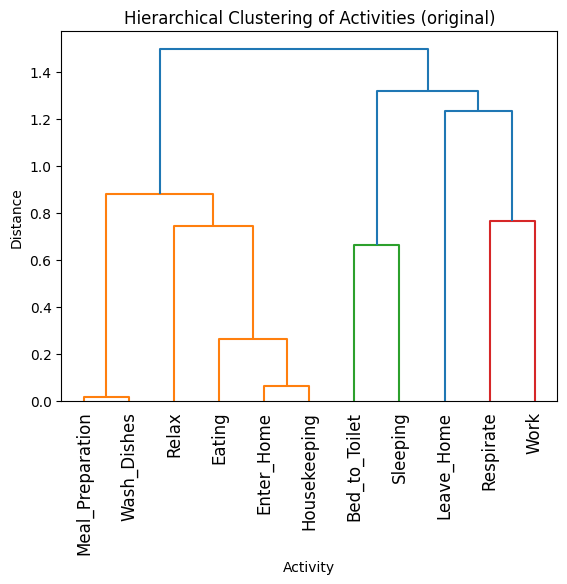

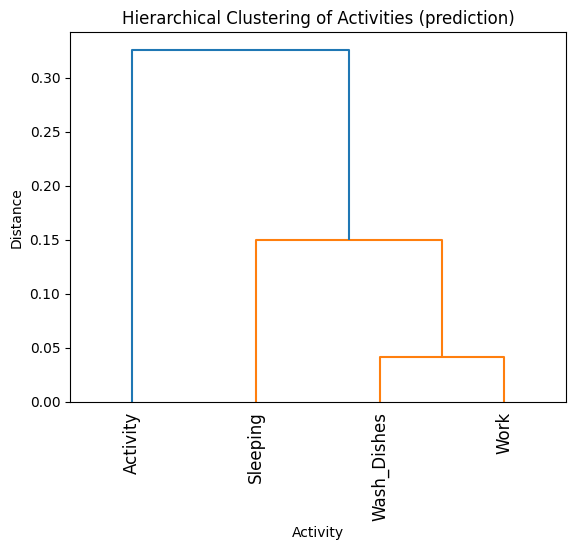

In [4]:
# Apply hierarchical clustering
z = linkage(squareform(activity_distance_matrix_correct), method='ward')
dendrogram(z, labels=activity_distance_matrix_correct.index, leaf_rotation=90)

plt.title("Hierarchical Clustering of Activities (original)")
plt.xlabel("Activity")
plt.ylabel("Distance")
plt.show()

z = linkage(squareform(activity_distance_matrix_validation), method='ward')
dendrogram(z, labels=activity_distance_matrix_validation.index, leaf_rotation=90)

plt.title("Hierarchical Clustering of Activities (prediction)")
plt.xlabel("Activity")
plt.ylabel("Distance")
plt.show()

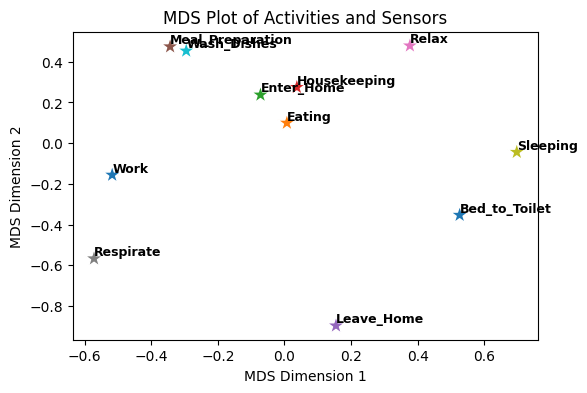

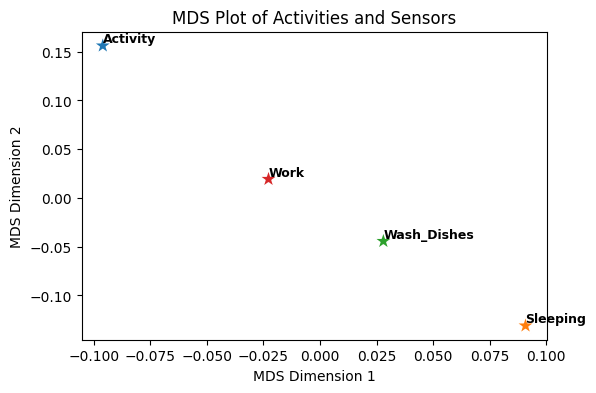

In [15]:
# Apply MDS to cluster activities
def MDS_clustering(activity_distance_matrix, normalized_combined_pivot_table):
    embedding = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    activity_coordinates = embedding.fit_transform(activity_distance_matrix)

    # Create a dataframe with MDS coordinates for activities
    activity_df = pd.DataFrame(activity_coordinates, columns=['x', 'y'], index=activity_distance_matrix.index)

    # Calculate the average coordinates for each sensor
    sensor_coordinates = pd.DataFrame(index=normalized_combined_pivot_table.columns, columns=['x', 'y'], dtype=float)

    for sensor in sensor_coordinates.index:
        sensor_coordinates.loc[sensor] = (normalized_combined_pivot_table[sensor] * activity_df).sum() / normalized_combined_pivot_table[sensor].sum()

    # Scale the sensor coordinates to be closer to their respective activities
    scaling_factor = 0.5
    scaled_sensor_coordinates = sensor_coordinates * scaling_factor

    # Create a scatter plot
    plt.figure(figsize=(6, 4))

    # Plot motion sensors
    # sns.scatterplot(data=scaled_sensor_coordinates, x='x', y='y', color='blue', label='Motion Sensors')

    # Plot activities
    sns.scatterplot(data=activity_df, x='x', y='y', hue=activity_df.index, palette='tab10', marker='*', s=200, legend=False)

    # Add labels
    # for i, sensor in enumerate(scaled_sensor_coordinates.index):
    #     plt.text(scaled_sensor_coordinates.loc[sensor, 'x'], scaled_sensor_coordinates.loc[sensor, 'y'], sensor, fontsize=9, ha='center', va='center')

    for i, activity in enumerate(activity_df.index):
        plt.text(activity_df.loc[activity, 'x'], activity_df.loc[activity, 'y'], activity, fontsize=9, ha='left', va='bottom', fontweight='bold')

    plt.xlabel('MDS Dimension 1')
    plt.ylabel('MDS Dimension 2')
    plt.title('MDS Plot of Activities and Sensors')

    # Show the plot
    plt.show()
    return

MDS_clustering(activity_distance_matrix_correct, normalized_combined_pivot_table_correct)
MDS_clustering(activity_distance_matrix_validation, normalized_combined_pivot_table_validation)

C:\Users\Alec\AppData\Local\Temp\ipykernel_4992\4047230014.py:108: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path, names=['Date', 'Time', 'Device ID', 'Status', 'Activity', 'Activity Status'])
C:\Users\Alec\AppData\Local\Temp\ipykernel_4992\4047230014.py:108: DtypeWarning: Columns (0,1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path, names=['Date', 'Time', 'Device ID', 'Status', 'Activity', 'Activity Status'])


Average Cosine Similarity: 0.046967065110297024
Percentage: 52.34835325551486


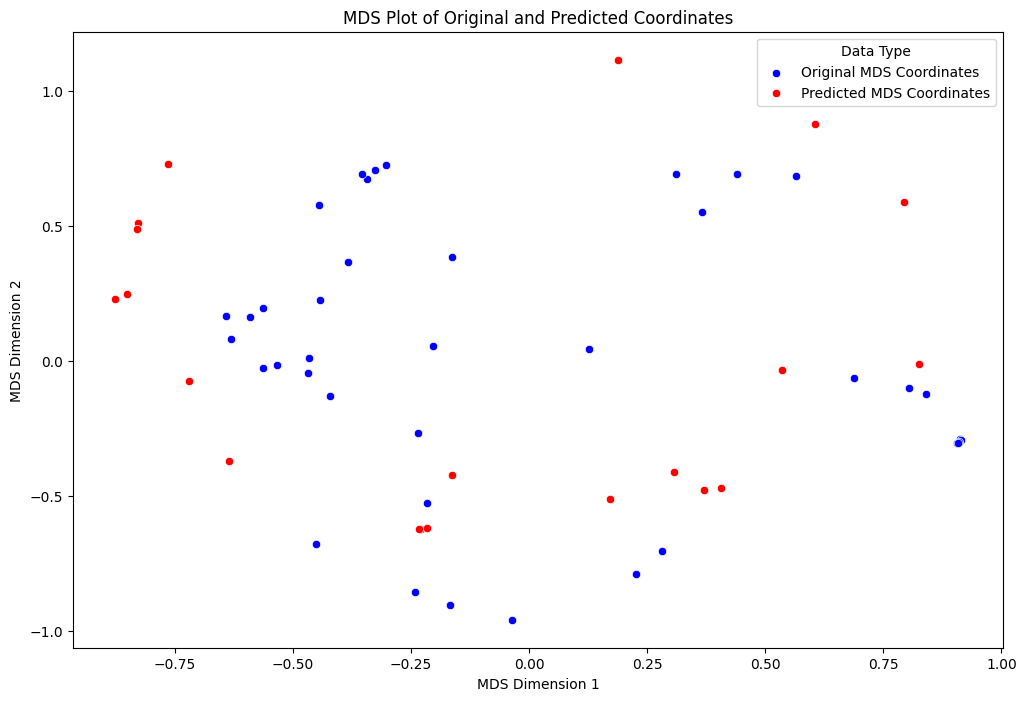

C:\Users\Alec\AppData\Local\Temp\ipykernel_4992\4047230014.py:9: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path, names=['Date', 'Time', 'Device ID', 'Status', 'Activity', 'Activity Status'])


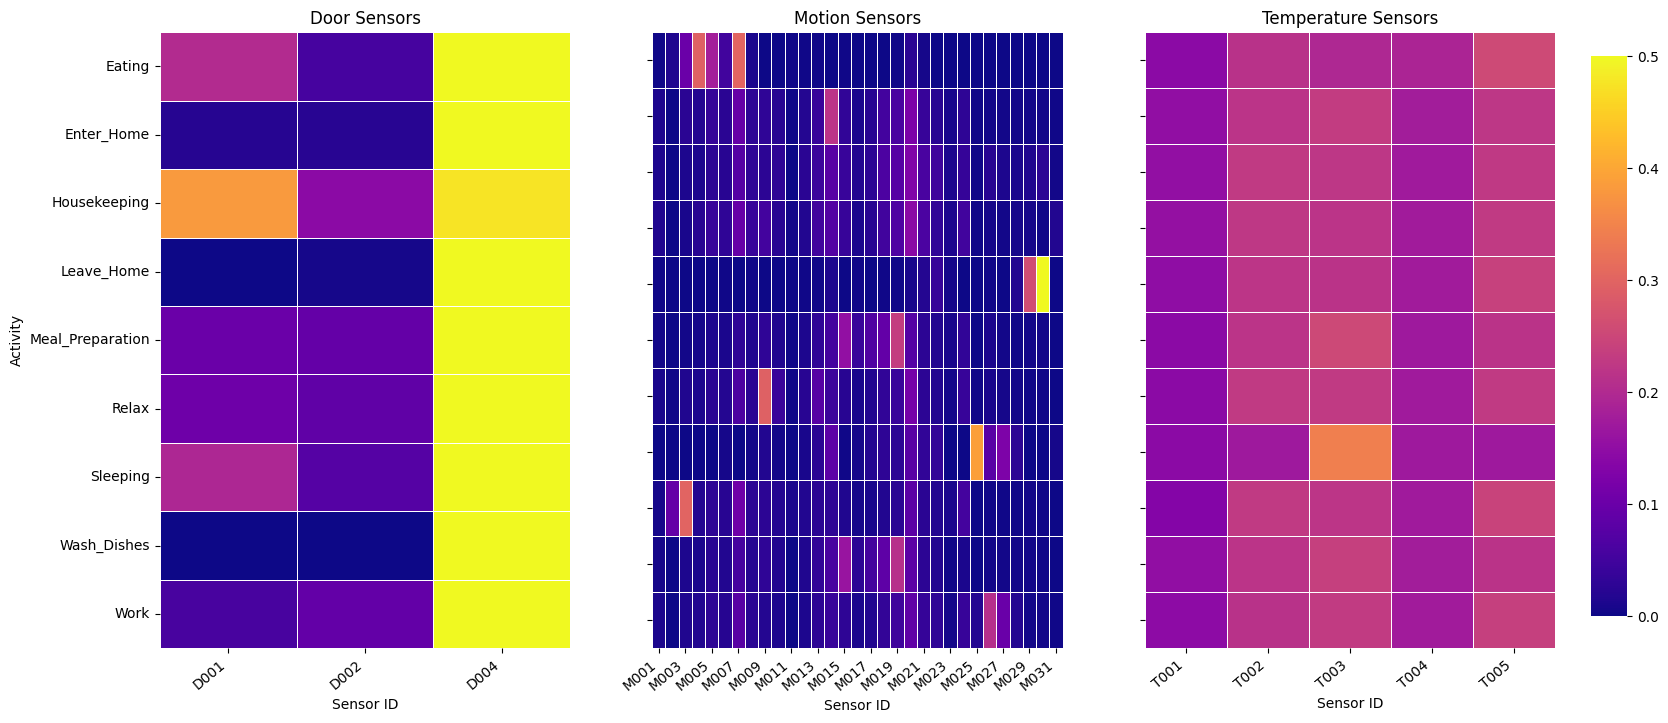

C:\Users\Alec\AppData\Local\Temp\ipykernel_4992\4047230014.py:75: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  activity_coordinates /= normalized_combined_pivot_table.sum(axis=1)[:, None]


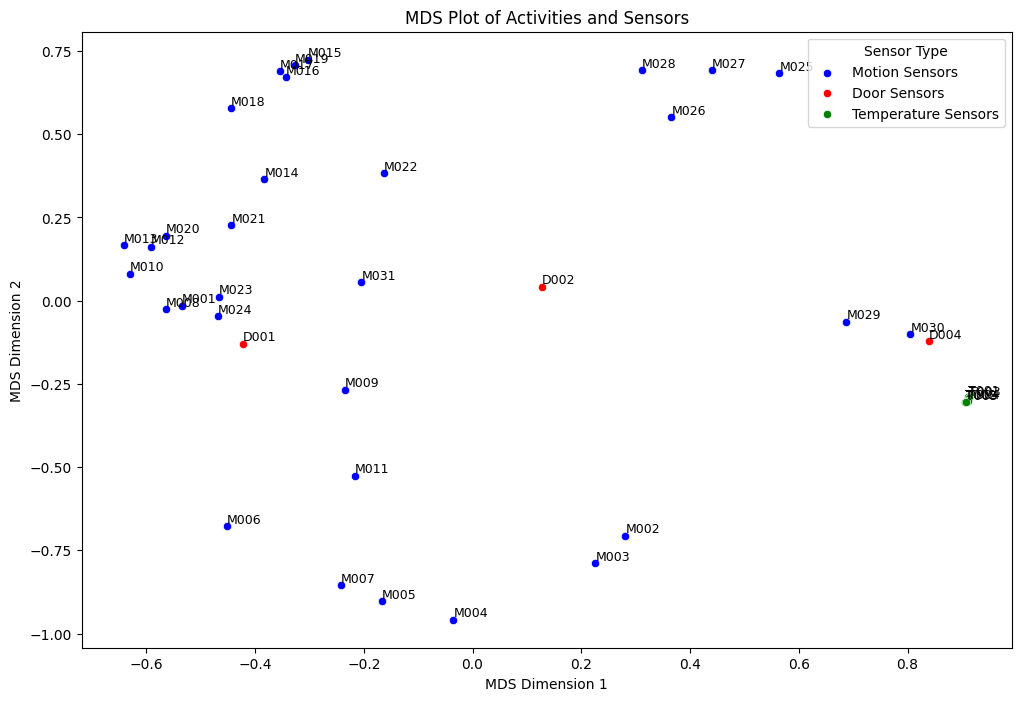

C:\Users\Alec\AppData\Local\Temp\ipykernel_4992\4047230014.py:9: DtypeWarning: Columns (0,1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(file_path, names=['Date', 'Time', 'Device ID', 'Status', 'Activity', 'Activity Status'])
C:\Users\Alec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\Alec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\Alec\

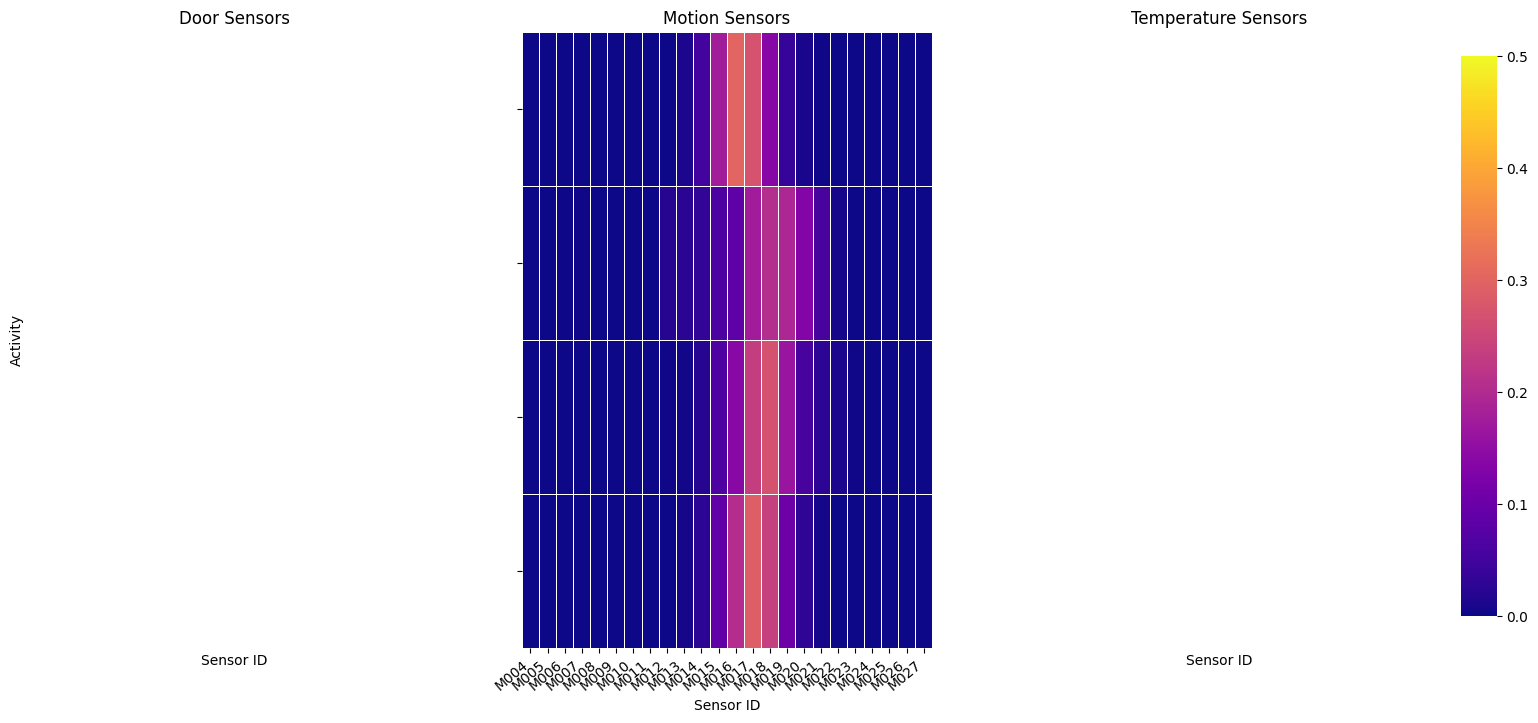

C:\Users\Alec\AppData\Local\Temp\ipykernel_4992\4047230014.py:75: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  activity_coordinates /= normalized_combined_pivot_table.sum(axis=1)[:, None]


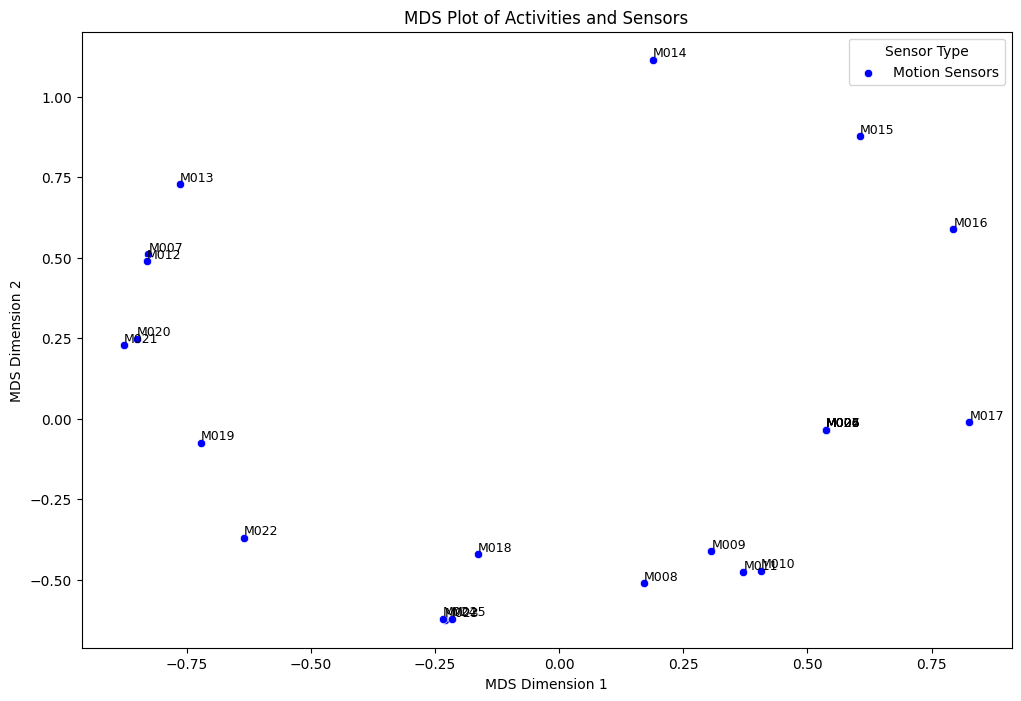

: 

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity

def heatmap(file_path):
    # Read data
    data_df = pd.read_csv(file_path, names=['Date', 'Time', 'Device ID', 'Status', 'Activity', 'Activity Status'])

    # Forward-fill the 'Activity' column so that each sensor event has an associated activity
    data_df['Activity'] = data_df['Activity'].fillna(method='ffill')

    # Filter the data by sensor type
    door_sensors = data_df[data_df['Device ID'].str.startswith('D')]
    door_sensors = door_sensors[~door_sensors['Device ID'].str.contains('Device ID')]
    motion_sensors = data_df[data_df['Device ID'].str.startswith('M')]
    temp_sensors = data_df[data_df['Device ID'].str.startswith('T')]

    sensor_types = [door_sensors, motion_sensors, temp_sensors]
    titles = ['Door Sensors', 'Motion Sensors', 'Temperature Sensors']

    # Create separate heatmaps for each sensor type
    # fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
    # Change the size to make the plots square
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    for i, (sensor_data, title) in enumerate(zip(sensor_types, titles)):
        # Create a pivot table to count the frequency of each sensor event for each activity
        pivot_table = sensor_data.pivot_table(index='Activity', columns='Device ID', values='Status', aggfunc='count', fill_value=0)
        # Normalize the pivot table by row to show the proportion of sensor events for each activity
        normalized_pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)
        
        # Create a heatmap
        sns.heatmap(normalized_pivot_table, cmap='plasma', annot=False, fmt='.5f', linewidths=.5, vmin=0, vmax=0.5, robust=True, ax=axes[i], cbar=i == 0, cbar_ax=None if i else cbar_ax)
        
        # Add labels
        axes[i].set_xlabel('Sensor ID')
        axes[i].set_ylabel('Activity' if i == 0 else '')
        axes[i].set_title(title)

        # Adjust x-axis labels
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=40, ha='right')
        # If the plot is not for the Door sensors, remove the y axis labels
        if i != 0:
            axes[i].set_yticklabels([])
            

    # Show the plot
    # plt.tight_layout()
    plt.show()

    # Create a combined pivot table with all sensor types
    combined_pivot_table = pd.concat(sensor_types).pivot_table(index='Activity', columns='Device ID', values='Status', aggfunc='count', fill_value=0)

    # Normalize the pivot table by row
    normalized_combined_pivot_table = combined_pivot_table.div(combined_pivot_table.sum(axis=1), axis=0)

    # Create a distance matrix (1 - correlation)
    distance_matrix = 1 - normalized_combined_pivot_table.corr()

    # Apply MDS
    embedding = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    mds_coordinates = embedding.fit_transform(distance_matrix)

    # Create a dataframe with MDS coordinates and sensor labels
    mds_df = pd.DataFrame(mds_coordinates, columns=['x', 'y'])
    mds_df['Sensor'] = distance_matrix.columns

    # Calculate the average coordinates for each activity
    activity_coordinates = pd.DataFrame(index=normalized_combined_pivot_table.index, columns=['x', 'y'], dtype=float)

    for activity in activity_coordinates.index:
        activity_coordinates.loc[activity] = (normalized_combined_pivot_table.loc[activity] * mds_df.set_index('Sensor')).sum() / normalized_combined_pivot_table.loc[activity].sum()
    activity_coordinates /= normalized_combined_pivot_table.sum(axis=1)[:, None]

    # Create a scatter plot
    plt.figure(figsize=(12, 8))

    # Plot motion sensors with the same color
    motion_sensor_mask = mds_df['Sensor'].str.startswith('M')
    sns.scatterplot(data=mds_df[motion_sensor_mask], x='x', y='y', color='blue', label='Motion Sensors')

    # Plot door sensors with the same color
    door_sensor_mask = mds_df['Sensor'].str.startswith('D')
    sns.scatterplot(data=mds_df[door_sensor_mask], x='x', y='y', color='red', label='Door Sensors')

    # Plot temperature sensors with the same color
    temp_sensor_mask = mds_df['Sensor'].str.startswith('T')
    sns.scatterplot(data=mds_df[temp_sensor_mask], x='x', y='y', color='green', label='Temperature Sensors')

    # Add labels
    for i, sensor in enumerate(mds_df['Sensor']):
        plt.text(mds_df.loc[i, 'x'], mds_df.loc[i, 'y'], sensor, fontsize=9, ha='left', va='bottom')

    plt.xlabel('MDS Dimension 1')
    plt.ylabel('MDS Dimension 2')
    plt.title('MDS Plot of Activities and Sensors')
    plt.legend(title='Sensor Type')

    # Show the plot
    plt.show()
    return


def get_mds_coordinates(file_path):
    # Read data
    data_df = pd.read_csv(file_path, names=['Date', 'Time', 'Device ID', 'Status', 'Activity', 'Activity Status'])

    # Forward-fill the 'Activity' column so that each sensor event has an associated activity
    data_df['Activity'] = data_df['Activity'].fillna(method='ffill')

    # Filter the data by sensor type
    door_sensors = data_df[data_df['Device ID'].str.startswith('D')]
    door_sensors = door_sensors[~door_sensors['Device ID'].str.contains('Device ID')]
    motion_sensors = data_df[data_df['Device ID'].str.startswith('M')]
    temp_sensors = data_df[data_df['Device ID'].str.startswith('T')]

    # Create a combined pivot table with all sensor types
    combined_pivot_table = pd.concat([door_sensors, motion_sensors, temp_sensors]).pivot_table(index='Activity', columns='Device ID', values='Status', aggfunc='count', fill_value=0)

    # Normalize the pivot table by row
    normalized_combined_pivot_table = combined_pivot_table.div(combined_pivot_table.sum(axis=1), axis=0)

    # Create a distance matrix (1 - correlation)
    distance_matrix = 1 - normalized_combined_pivot_table.corr()

    # Apply MDS
    embedding = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    mds_coordinates = embedding.fit_transform(distance_matrix)

    return mds_coordinates

def plot_mds_coordinates(mds_coordinates_original, mds_coordinates_predicted):
    # Create a scatter plot
    plt.figure(figsize=(12, 8))

    sns.scatterplot(x=mds_coordinates_original[:, 0], y=mds_coordinates_original[:, 1], color='blue', label='Original MDS Coordinates')
    sns.scatterplot(x=mds_coordinates_predicted[:, 0], y=mds_coordinates_predicted[:, 1], color='red', label='Predicted MDS Coordinates')

    plt.xlabel('MDS Dimension 1')
    plt.ylabel('MDS Dimension 2')
    plt.title('MDS Plot of Original and Predicted Coordinates')
    plt.legend(title='Data Type')

    # Show the plot
    plt.show()

mds_coordinates_original = get_mds_coordinates(FILE_PATH_CORRECT)
mds_coordinates_predicted = get_mds_coordinates(FILE_PATH_VALIDATION)

def calculate_average_cosine_similarity(mds_coordinates_original, mds_coordinates_predicted):
    similarity_matrix = cosine_similarity(mds_coordinates_original, mds_coordinates_predicted)
    diagonal_elements = similarity_matrix.diagonal()
    average_cosine_similarity = diagonal_elements.mean()
    return average_cosine_similarity

average_cosine_similarity = calculate_average_cosine_similarity(mds_coordinates_original, mds_coordinates_predicted)
print("Average Cosine Similarity:", average_cosine_similarity)
normalized_similarity = (average_cosine_similarity + 1) / 2
percentage = normalized_similarity * 100
print("Percentage:", percentage)

plot_mds_coordinates(mds_coordinates_original, mds_coordinates_predicted)
heatmap(FILE_PATH_CORRECT)
heatmap(FILE_PATH_VALIDATION)

C:\Users\Alec\AppData\Local\Temp\ipykernel_6600\562855837.py:9: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(FILE_PATH, names=['Date', 'Time', 'Device ID', 'Status', 'Activity', 'Activity Status'])


KeyError: 'label'

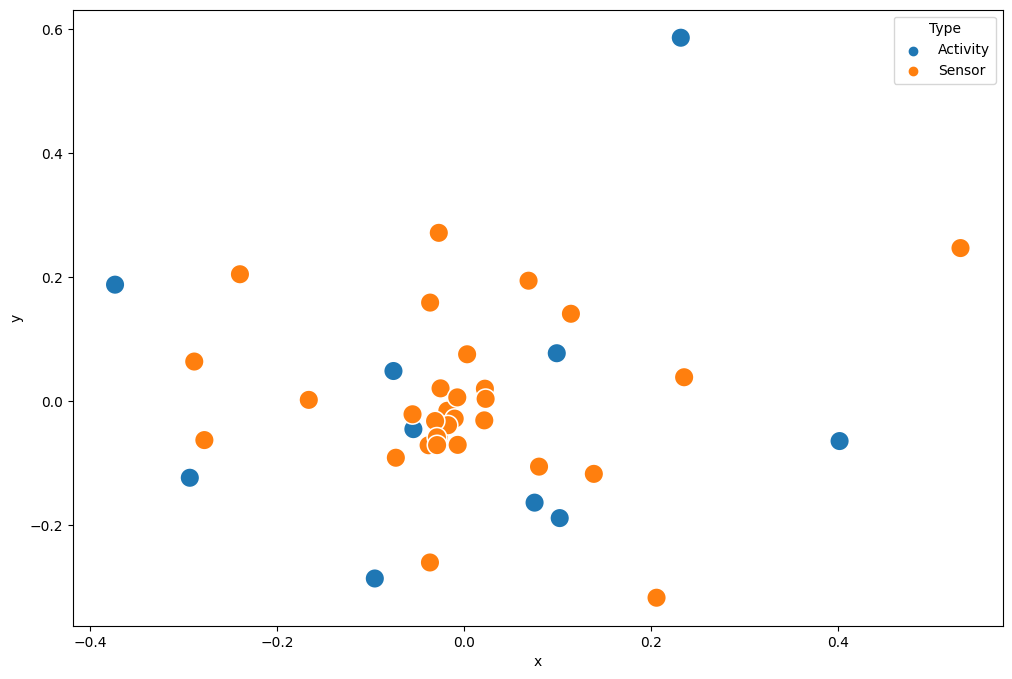

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

FILE_PATH = '../Processed Data/Aruba_17/pre_processed_data.csv'

# Read data
data_df = pd.read_csv(FILE_PATH, names=['Date', 'Time', 'Device ID', 'Status', 'Activity', 'Activity Status'])

# Forward-fill the 'Activity' column so that each sensor event has an associated activity
data_df['Activity'] = data_df['Activity'].fillna(method='ffill')

# Filter the data by sensor type
motion_sensors = data_df[data_df['Device ID'].str.startswith('M')]

# Create a combined pivot table with all sensor types
combined_pivot_table = motion_sensors.pivot_table(index='Activity', columns='Device ID', values='Status', aggfunc='count', fill_value=0)

# Normalize the pivot table by row
normalized_combined_pivot_table = combined_pivot_table.div(combined_pivot_table.sum(axis=1), axis=0)

# Compute MDS for activities
embedding_activity = MDS(n_components=2, random_state=42)
activity_coordinates = embedding_activity.fit_transform(normalized_combined_pivot_table)

# Compute MDS for sensors
embedding_sensor = MDS(n_components=2, random_state=42)
sensor_coordinates = embedding_sensor.fit_transform(normalized_combined_pivot_table.T)

# Create DataFrames for activities and sensors
activity_df = pd.DataFrame(activity_coordinates, columns=['x', 'y'], index=normalized_combined_pivot_table.index)
sensor_df = pd.DataFrame(sensor_coordinates, columns=['x', 'y'], index=normalized_combined_pivot_table.columns)

# Combine activity and sensor DataFrames with their respective types
activity_df_with_type = activity_df.reset_index().rename(columns={'index': 'label'})
activity_df_with_type['Type'] = 'Activity'

sensor_df_with_type = sensor_df.reset_index().rename(columns={'index': 'label'})
sensor_df_with_type['Type'] = 'Sensor'

combined_df = pd.concat([activity_df_with_type, sensor_df_with_type], ignore_index=True)

# Plot combined DataFrame
plt.figure(figsize=(12, 8))
sns.scatterplot(data=combined_df, x='x', y='y', hue='Type', s=200)

# Add labels
for _, row in combined_df.iterrows():
    plt.text(row['x'], row['y'], row['label'], fontsize=9, ha='center', va='center', fontweight='bold')

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS Plot of Activities and Sensors')
plt.legend(title='Type')

# Show the plot
plt.show()